In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [82]:
def getSeason(release_date):
    if (release_date[0:3] == "Dec" or  release_date[0:3] == "Jan" or release_date[0:3] == "Feb"):
        return "Winter"
    elif(release_date[0:3] == "Mar" or release_date[0:3] == "Apr" or release_date[0:3] == "May"):
        return "Spring"
    elif(release_date[0:3] == "Jun" or release_date[0:3] == "Jul" or release_date[0:3] == "Aug"):
        return "Summer"
    else:
        return "Fall"
    
season = budget.release_date.apply(getSeason)
budget['Season'] = season
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Winter
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Fall


In [83]:
budget["Season"].value_counts()

Fall      1552
Winter    1484
Summer    1415
Spring    1331
Name: Season, dtype: int64

In [84]:
budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')

budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0,Winter
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0,Fall


In [85]:
budget[['domestic_gross', 'production_budget']] = budget[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
budget = budget.drop(columns="worldwide_gross") #profit column

budget

,id,release_date,movie,production_budget,domestic_gross,Season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter
5778,79,"Apr 2, 1999",Following,6000,48482,Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,Fall


In [86]:
budget["profit"] = budget["domestic_gross"] - budget["production_budget"]
budget

,id,release_date,movie,production_budget,domestic_gross,Season,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,Winter,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Spring,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,303181382
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,Spring,42482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,Summer,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,Fall,-1400


Text(0.5, 1.0, 'Seasonal profit')

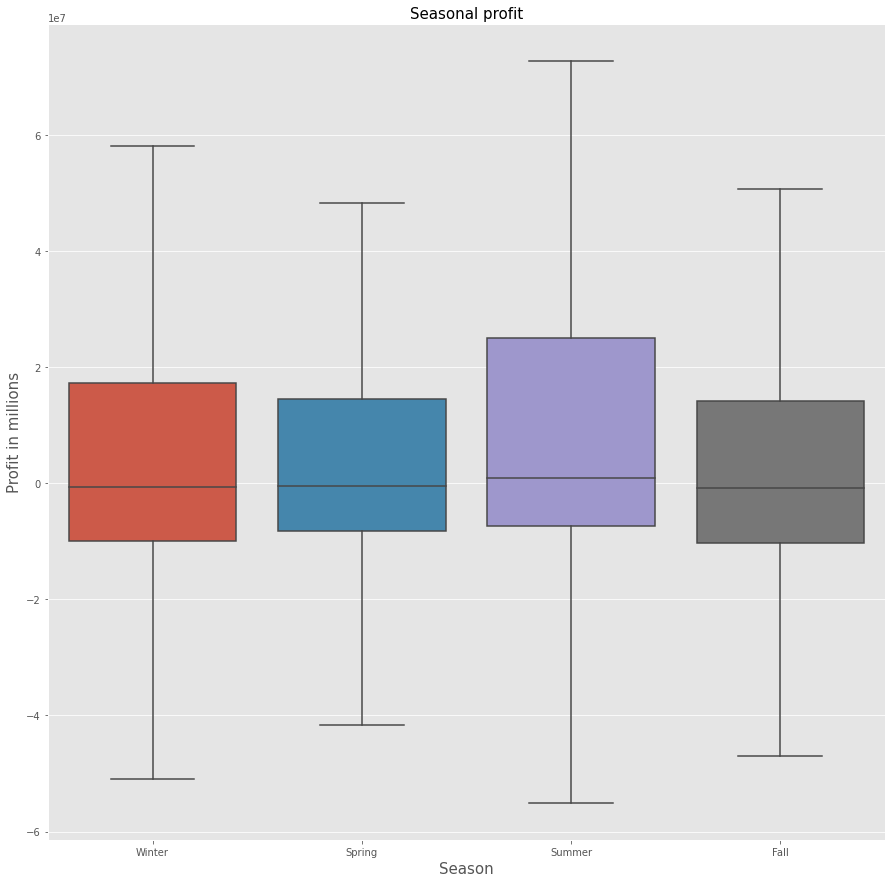

In [87]:
# Your code here
plot_five_fig, plot_five_ax = plt.subplots(figsize=(15,15))

sns.boxplot(x='Season', y='profit', data=budget, ax=plot_five_ax, showfliers=False)

plot_five_ax.set_xlabel('Season', fontsize = 15)

plot_five_ax.set_ylabel('Profit in millions', fontsize = 15)

plot_five_ax.set_title('Seasonal profit', fontsize = 15)

NameError: name 'budget_groups2' is not defined

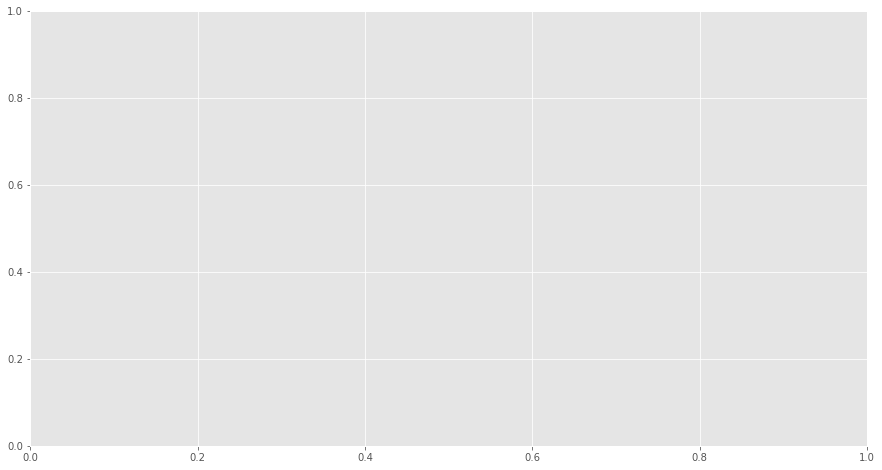

In [78]:



fig, ax = plt.subplots(figsize=(15,8))
N = 5
ind = np.arange(N) 
width = 0.25

xvals = budget_groups2['domestic_gross']
bar1 = plt.bar(ind, xvals, width, color = 'orange')

yvals2 = budget_groups2['profit']
bar2 = plt.bar(ind+width, yvals2, width, color = 'mediumseagreen')

zvals3 = budget_groups2['production_budget']
bar3 = plt.bar(ind-width, zvals3, width, color = 'slateblue')


plt.xlabel("Year of Release", fontsize=15)
plt.ylabel('U.S. Dollars in Hundreds of Millions ($)', fontsize=15)
plt.title("Yearly Comparison of Production Budget, Gross, & Profit", fontsize=20)

plt.axhline(y=0.5, color='black', linestyle='--')


plt.xticks(ind+width, ['2015','2016','2017','2018','2019'])
plt.legend( (bar1, bar2, bar3), ('Domestic Gross', 'Profit', 'Production Budget') )

plt.show()

ValueError: Could not interpret input 'month'

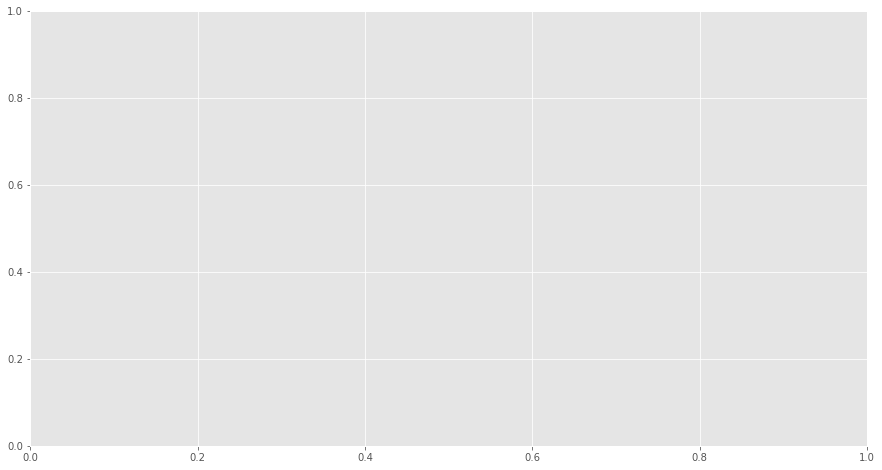

In [79]:
plot_one_fig, plot_one_ax = plt.subplots(figsize=(15,8))

sns.boxplot(x='month', y='profit', data=budget, ax=plot_one_ax, showfliers=False)
plot_one_ax.set_xlabel('Month', fontsize=15)
plot_one_ax.set_ylabel('Profit in Hundreds of Millions', fontsize=15)
plot_one_ax.set_title('Monthly Profits', fontsize=15);
plt.savefig('MonthlyProfitsReal.png')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

**Reads in the Rotten Tomatoes csv data and prints the first few rows**

In [10]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


**Reads in the movie gross csv data and prints the first few rows**

In [11]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


**Merges the two DataFrames together on the movie title and creates a DataFrame with only the data we want to work with**

In [12]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()

In [13]:
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


**Checks info() to see how many null values are in the DataFrame rows**

In [14]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2149 non-null   object 
 1   genres              2149 non-null   object 
 2   tomatometer_rating  2148 non-null   float64
 3   domestic_gross      2137 non-null   float64
dtypes: float64(2), object(2)
memory usage: 83.9+ KB


**Removes any rows with null values**

In [15]:
df_rating_genres.dropna(inplace=True)
df_rating_genres.head(12)

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
6,Gone,"Horror, Mystery & Suspense",54.0,11700000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
9,Priest,"Action & Adventure, Horror, Mystery & Suspense...",15.0,29100000.0


**Drops the duplicate values !!**

In [16]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


**Checks for any more missing values and how many rows were removed**

In [17]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2063 non-null   object 
 1   genres              2063 non-null   object 
 2   tomatometer_rating  2063 non-null   float64
 3   domestic_gross      2063 non-null   float64
dtypes: float64(2), object(2)
memory usage: 80.6+ KB


**Looks at the highest and lowest gross to get a feel for which genres do best**

In [18]:
df_sorted = df_rating_genres.sort_values('domestic_gross', ascending=False)
df_sorted

,movie_title,genres,tomatometer_rating,domestic_gross
343,Black Panther,"Action & Adventure, Drama, Science Fiction & F...",96.0,700100000.0
283,Avengers: Infinity War,"Action & Adventure, Science Fiction & Fantasy",85.0,678800000.0
923,Jurassic World,"Action & Adventure, Mystery & Suspense, Scienc...",70.0,652300000.0
1096,Marvel's The Avengers,"Action & Adventure, Science Fiction & Fantasy",92.0,623400000.0
1496,Star Wars: The Last Jedi,"Action & Adventure, Drama, Science Fiction & F...",90.0,620200000.0
...,...,...,...,...
267,Jackpot,Action & Adventure,59.0,800.0
238,Amityville: The Awakening,"Horror, Mystery & Suspense",30.0,700.0
863,Into the White,"Action & Adventure, Art House & International,...",45.0,700.0
120,2:22,"Drama, Mystery & Suspense",22.0,400.0


**Splits the genres in the genres row into a list containing the genres**

In [19]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)

df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,[Comedy],87.0,4000000.0
2,Going the Distance,"[Comedy, Romance]",54.0,17800000.0
5,The Silence,"[Horror, Mystery & Suspense]",30.0,100000.0
7,Gone,[Mystery & Suspense],12.0,11700000.0
8,Fireflies in the Garden,[Drama],22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"[Art House & International, Comedy, Drama]",92.0,3100000.0
2145,Zombeavers,"[Action & Adventure, Comedy, Horror]",69.0,14900.0
2146,Zookeeper,"[Comedy, Romance]",14.0,80400000.0
2147,Zoolander 2,[Comedy],22.0,28800000.0


**Explodes the genres column which separates all the genres for each movie into its own column**

In [20]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


**Checks the data types of the columns**

In [21]:
df_rating_genres.dtypes

movie_title            object
genres                 object
tomatometer_rating    float64
domestic_gross        float64
dtype: object

**Strips any whitespace from the genres in the genres column**

In [22]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()

**I only want to focus on genres with enough data points to generate sufficient means so I will only look at genres above 150 data values**

In [23]:
df_rating_genres['genres'].value_counts() 

Drama                        1145
Comedy                        632
Action & Adventure            496
Mystery & Suspense            403
Art House & International     249
Science Fiction & Fantasy     244
Romance                       175
Horror                        171
Documentary                   140
Kids & Family                 126
Animation                     116
Special Interest               89
Musical & Performing Arts      61
Sports & Fitness               21
Western                        19
Classics                       12
Television                     10
Faith & Spirituality            6
Cult Movies                     1
Anime & Manga                   1
Gay & Lesbian                   1
Name: genres, dtype: int64

**Creates a new DataFrame of all the movies classified as the specified genre**

In [24]:
df_comedy = df_rating_genres.loc[df_rating_genres['genres'] == 'Comedy']
df_romance = df_rating_genres.loc[df_rating_genres['genres'] == 'Romance']
df_horror = df_rating_genres.loc[df_rating_genres['genres'] == 'Horror']
df_mystery_suspence = df_rating_genres.loc[df_rating_genres['genres'] == 'Mystery & Suspense']
df_action_adventure = df_rating_genres.loc[df_rating_genres['genres'] == 'Action & Adventure']
df_animation = df_rating_genres.loc[df_rating_genres['genres'] == 'Animation']
df_art = df_rating_genres.loc[df_rating_genres['genres'] == 'Art House & International']
df_drama = df_rating_genres.loc[df_rating_genres['genres'] == 'Drama']

**Finds the mean of the domestic gross profit for all the relevent DataFrames**

In [25]:
#mean of the comedy gross profit 
y_comedy = round(df_comedy['domestic_gross'].mean())
y_drama = round(df_drama['domestic_gross'].mean())
y_romance = round(df_romance['domestic_gross'].mean())
y_horror = round(df_horror['domestic_gross'].mean())
y_mystery = round(df_mystery_suspence['domestic_gross'].mean())
y_action_adventure = round(df_action_adventure['domestic_gross'].mean())
y_animation = round(df_animation['domestic_gross'].mean())
y_art = round(df_art['domestic_gross'].mean())


**Finds the mean of the tomatometer rating for all the relevent genre DataFrames**

In [26]:
#mean of the comedy genre tomato ratings
x_comedy = round(df_comedy['tomatometer_rating'].mean())
x_romance = round(df_romance['tomatometer_rating'].mean())
x_horror = round(df_horror['tomatometer_rating'].mean())
x_mystery = round(df_mystery_suspence['tomatometer_rating'].mean())
x_action_adventure = round(df_action_adventure['tomatometer_rating'].mean())
x_animation = round(df_animation['tomatometer_rating'].mean())
x_art = round(df_art['tomatometer_rating'].mean())
x_drama = round(df_drama['tomatometer_rating'].mean())

**Graphs all the genre DataFrames to get an idea of which genre has the highest ratings and brought the most profit**

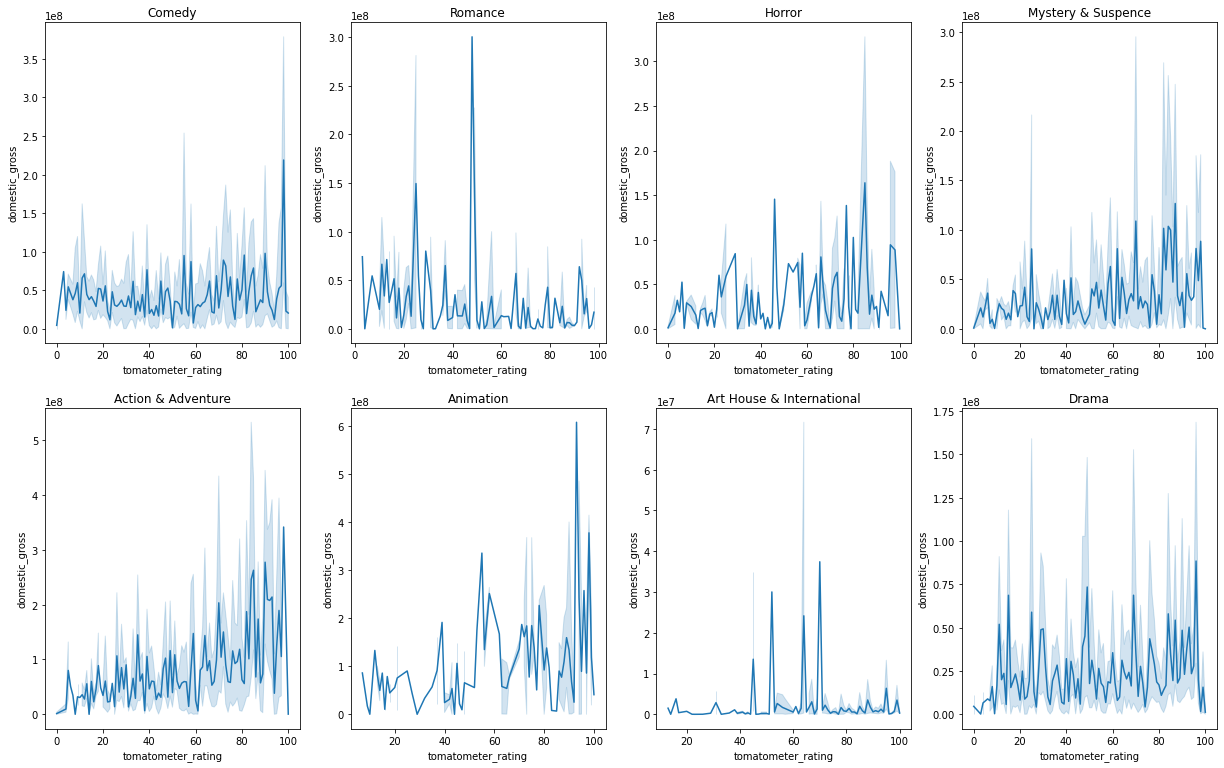

In [27]:
fig, axes =plt.subplots(nrows=2,ncols=4, figsize =(21,13))
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross", ax=axes[0][0]).set(title='Comedy')
sns.lineplot(data=df_romance, x="tomatometer_rating", y="domestic_gross", ax=axes[0][1]).set(title='Romance')
sns.lineplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=axes[0][2]).set(title='Horror')
sns.lineplot(data=df_mystery_suspence, x="tomatometer_rating", y="domestic_gross", ax=axes[0][3]).set(title='Mystery & Suspence')
sns.lineplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=axes[1][0]).set(title='Action & Adventure')
sns.lineplot(data=df_animation, x="tomatometer_rating", y="domestic_gross", ax=axes[1][1]).set(title='Animation')
sns.lineplot(data=df_art, x="tomatometer_rating", y="domestic_gross", ax=axes[1][2]).set(title='Art House & International')
sns.lineplot(data=df_drama, x="tomatometer_rating", y="domestic_gross", ax=axes[1][3]).set(title='Drama');

**Comedy, Horror, and Action & Adventure appears to be the highest so this is a graph of them together**

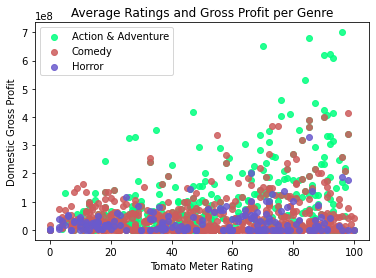

In [28]:
fig, ax = plt.subplots(1, 1)

ax.scatter(df_action_adventure['tomatometer_rating'], df_action_adventure["domestic_gross"], color="springgreen", label="Action & Adventure", alpha=0.85)
ax.scatter(df_comedy['tomatometer_rating'], df_comedy["domestic_gross"], color="indianred", label="Comedy", alpha=0.85)
ax.scatter(df_horror['tomatometer_rating'], df_horror["domestic_gross"], color="slateblue", label="Horror", alpha=0.85)

ax.set_title('Average Ratings and Gross Profit per Genre')

ax.set_ylabel('Domestic Gross Profit')
ax.set_xlabel('Tomato Meter Rating')
ax.legend();

**Theats a little busy lets split them up and show them in a linear regression plot**

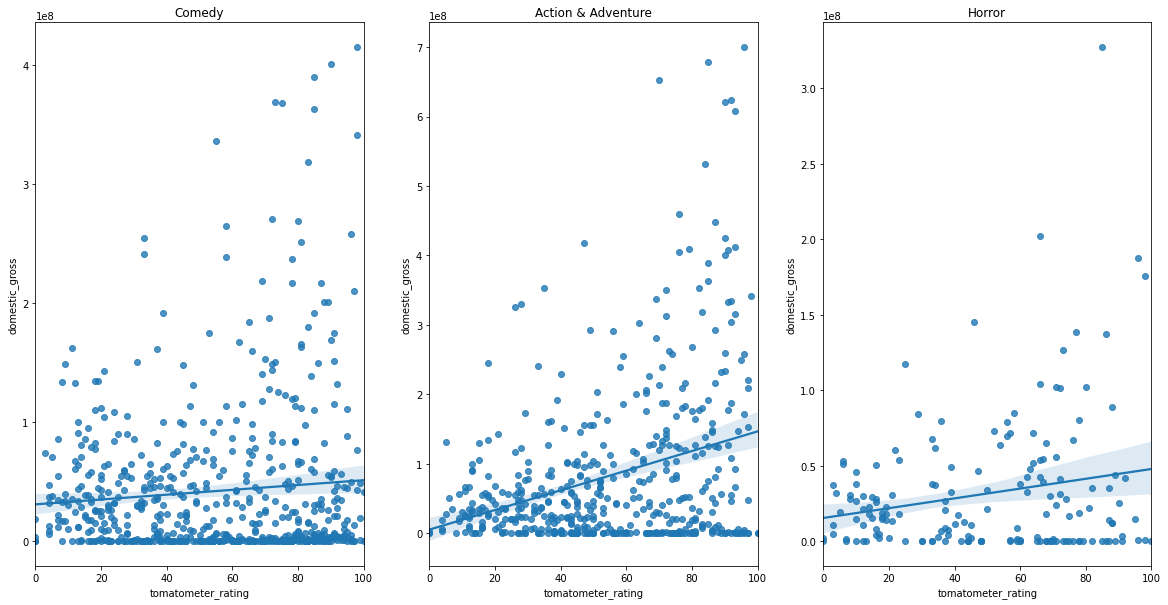

In [29]:
fig, ax = plt.subplots(figsize=(20,10), ncols=3)

sns.regplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross",ax=ax[0]).set(title='Comedy')
sns.regplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=ax[1]).set(title='Action & Adventure')
sns.regplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=ax[2]).set(title='Horror');

**Lets simplify this to just show the linear regression lines for these top three genres and put them back together**

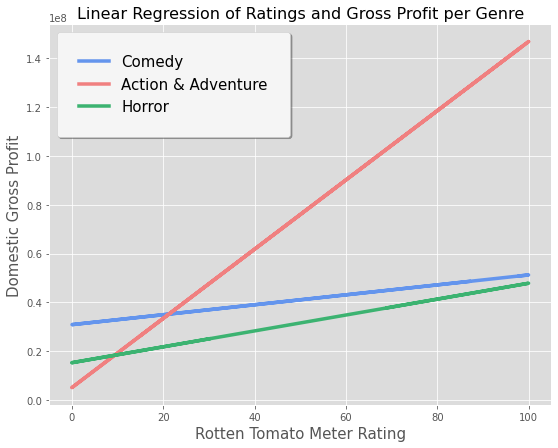

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9,7))

ax.set_facecolor('gainsboro')

x = np.array(df_comedy['tomatometer_rating'])
y = np.array(df_comedy['domestic_gross'])

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color='cornflowerblue', linewidth=3.5)

x = np.array(df_action_adventure['tomatometer_rating'])
y = np.array(df_action_adventure['domestic_gross'])

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color='lightcoral', linewidth=3.5)

x = np.array(df_horror['tomatometer_rating'])
y = np.array(df_horror['domestic_gross'])

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color='mediumseagreen', linewidth=3.5)

ax.set_title('Linear Regression of Ratings and Gross Profit per Genre', fontsize=16)

ax.set_ylabel('Domestic Gross Profit', fontsize=15)
ax.set_xlabel('Rotten Tomato Meter Rating',fontsize=15)

plt.legend(['Comedy','Action & Adventure', 'Horror'], fancybox=True, framealpha=1, shadow=True, 
           borderpad=1.5, prop={"size":15}, facecolor='whitesmoke');


**This is a scatter plot of the means of the ratings and gross profit columns for all the genres graphed together on a scatter plot**

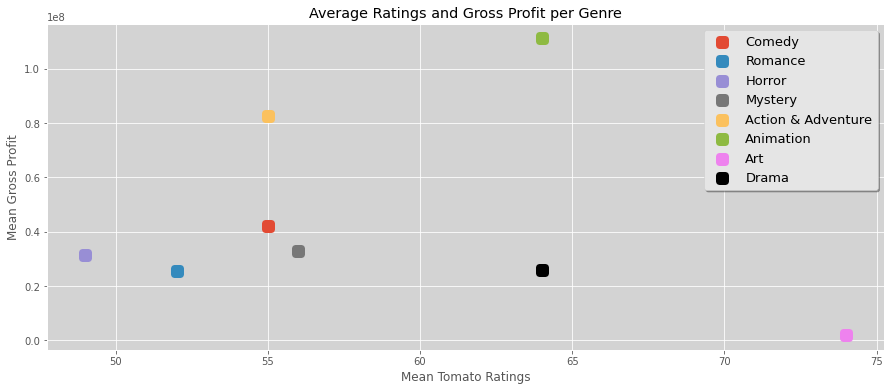

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x_comedy,y_comedy, marker='s', linewidth=7)
ax.scatter(x_romance,y_romance, marker='s', linewidth=7)
ax.scatter(x_horror,y_horror, marker='s', linewidth=7)
ax.scatter(x_mystery,y_mystery, marker='s', linewidth=7)
ax.scatter(x_action_adventure,y_action_adventure, marker='s', linewidth=7)
ax.scatter(x_animation,y_animation, marker='s', linewidth=7)
ax.scatter(x_art,y_art, marker='s', linewidth=7, color='violet')
ax.scatter(x_drama,y_drama, marker='s', linewidth=7, color='black')


ax.legend(['Comedy', 'Romance', 'Horror', 'Mystery', 'Action & Adventure', 'Animation',
          'Art', 'Drama'], prop={"size":13}, fancybox=True, framealpha=1, shadow=True)

ax.set_xlabel('Mean Tomato Ratings')
ax.set_ylabel('Mean Gross Profit')
ax.set_title('Average Ratings and Gross Profit per Genre')
ax.set_facecolor('lightgrey')

**It appears that the Action & Adventure genre will bring the most domestic profit and have the highest rating**

In [32]:
seasons_merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_seasons = merged[['movie_title','genres', 'domestic_gross', 'original_release_date']].copy()

In [33]:
df_rating_seasons

,movie_title,genres,domestic_gross,original_release_date
0,Please Give,Comedy,4000000.0,2010-04-30
1,Going the Distance,Comedy,17800000.0,2004-08-20
2,Going the Distance,"Comedy, Romance",17800000.0,2010-09-03
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",100000.0,NaN
4,The Silence,"Art House & International, Drama, Mystery & Su...",100000.0,2013-03-08
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",3100000.0,2011-05-27
2145,Zombeavers,"Action & Adventure, Comedy, Horror",14900.0,2015-03-20
2146,Zookeeper,"Comedy, Romance",80400000.0,2011-07-08
2147,Zoolander 2,Comedy,28800000.0,2016-02-12


In [34]:
df_rating_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            2149 non-null   object 
 1   genres                 2149 non-null   object 
 2   domestic_gross         2137 non-null   float64
 3   original_release_date  2128 non-null   object 
dtypes: float64(1), object(3)
memory usage: 83.9+ KB


In [35]:
df_rating_seasons.dropna(inplace=True)

In [36]:
df_rating_seasons.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_seasons

,movie_title,genres,domestic_gross,original_release_date
0,Please Give,Comedy,4000000.0,2010-04-30
2,Going the Distance,"Comedy, Romance",17800000.0,2010-09-03
5,The Silence,"Horror, Mystery & Suspense",100000.0,2019-12-07
7,Gone,Mystery & Suspense,11700000.0,2012-02-24
8,Fireflies in the Garden,Drama,70600.0,2011-10-14
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",3100000.0,2011-05-27
2145,Zombeavers,"Action & Adventure, Comedy, Horror",14900.0,2015-03-20
2146,Zookeeper,"Comedy, Romance",80400000.0,2011-07-08
2147,Zoolander 2,Comedy,28800000.0,2016-02-12


In [37]:
df_rating_seasons['genres'] = df_rating_seasons['genres'].str.split(',', expand = False)

In [38]:
df_rating_seasons = df_rating_seasons.explode('genres')

In [39]:
df_rating_seasons['genres'] = df_rating_seasons['genres'].str.strip()

In [40]:
df_rating_seasons['month'] = df_rating_seasons['original_release_date'].apply(lambda x: x[5:7])
df_rating_seasons

,movie_title,genres,domestic_gross,original_release_date,month
0,Please Give,Comedy,4000000.0,2010-04-30,04
2,Going the Distance,Comedy,17800000.0,2010-09-03,09
2,Going the Distance,Romance,17800000.0,2010-09-03,09
5,The Silence,Horror,100000.0,2019-12-07,12
5,The Silence,Mystery & Suspense,100000.0,2019-12-07,12
...,...,...,...,...,...
2146,Zookeeper,Romance,80400000.0,2011-07-08,07
2147,Zoolander 2,Comedy,28800000.0,2016-02-12,02
2148,Zootopia,Action & Adventure,341300000.0,2016-03-04,03
2148,Zootopia,Animation,341300000.0,2016-03-04,03


In [41]:
df_rating_seasons

,movie_title,genres,domestic_gross,original_release_date,month
0,Please Give,Comedy,4000000.0,2010-04-30,04
2,Going the Distance,Comedy,17800000.0,2010-09-03,09
2,Going the Distance,Romance,17800000.0,2010-09-03,09
5,The Silence,Horror,100000.0,2019-12-07,12
5,The Silence,Mystery & Suspense,100000.0,2019-12-07,12
...,...,...,...,...,...
2146,Zookeeper,Romance,80400000.0,2011-07-08,07
2147,Zoolander 2,Comedy,28800000.0,2016-02-12,02
2148,Zootopia,Action & Adventure,341300000.0,2016-03-04,03
2148,Zootopia,Animation,341300000.0,2016-03-04,03


In [42]:
df_rating_seasons['month_name'] = df_rating_seasons['month'].map({'01':'Janauary',
'02':'February',
'03':'March',
'04':'April',
'05':'May',
'06':'June',
'07':'July',
'08':'August',
'09':'September',
'10':'October',
'11':'November',
'12':'December'})
df_rating_seasons

,movie_title,genres,domestic_gross,original_release_date,month,month_name
0,Please Give,Comedy,4000000.0,2010-04-30,04,April
2,Going the Distance,Comedy,17800000.0,2010-09-03,09,September
2,Going the Distance,Romance,17800000.0,2010-09-03,09,September
5,The Silence,Horror,100000.0,2019-12-07,12,December
5,The Silence,Mystery & Suspense,100000.0,2019-12-07,12,December
...,...,...,...,...,...,...
2146,Zookeeper,Romance,80400000.0,2011-07-08,07,July
2147,Zoolander 2,Comedy,28800000.0,2016-02-12,02,February
2148,Zootopia,Action & Adventure,341300000.0,2016-03-04,03,March
2148,Zootopia,Animation,341300000.0,2016-03-04,03,March


In [43]:
df_rating_seasons.dtypes

movie_title               object
genres                    object
domestic_gross           float64
original_release_date     object
month                     object
month_name                object
dtype: object

In [44]:
df_rating_seasons.dtypes

movie_title               object
genres                    object
domestic_gross           float64
original_release_date     object
month                     object
month_name                object
dtype: object

In [45]:
real_df = df_rating_seasons.groupby(['genres', 'month_name']).mean().reset_index()
real_df

,genres,month_name,domestic_gross
0,Action & Adventure,April,6.927307e+07
1,Action & Adventure,August,5.593980e+07
2,Action & Adventure,December,1.118571e+08
3,Action & Adventure,February,7.275662e+07
4,Action & Adventure,Janauary,4.067424e+07
...,...,...,...
195,Western,July,9.475000e+07
196,Western,June,3.939000e+06
197,Western,May,3.610000e+07
198,Western,November,1.210550e+06


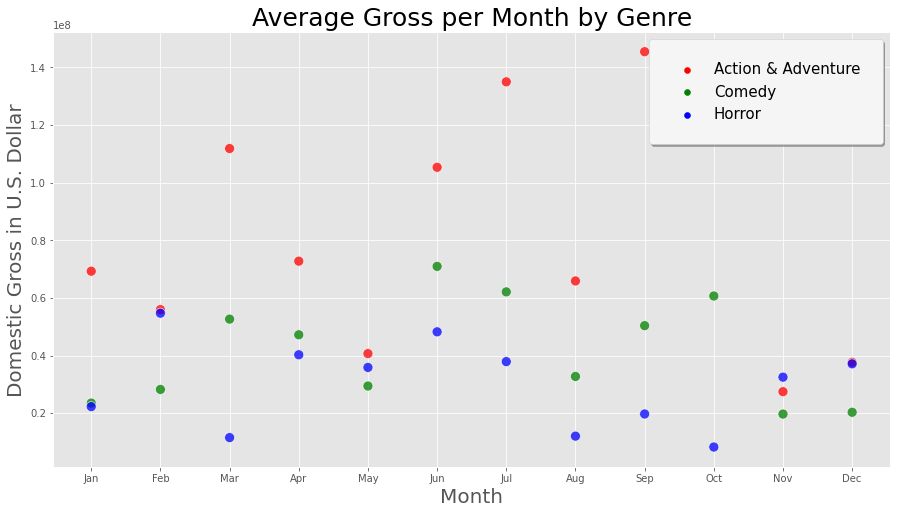

In [46]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(15, 8))

filtered = real_df.loc[(real_df['genres'] == 'Comedy')|(real_df['genres'] == 'Horror')|(real_df['genres']=='Action & Adventure')]
x = sns.scatterplot(data = filtered, x = "month_name", y = "domestic_gross", hue ='genres', palette=['red','green','blue'], alpha=.75, s=100);

ax.legend(prop={"size":15}, loc=1, fancybox=True, framealpha=1, shadow=True, 
           borderpad=1.5, facecolor='whitesmoke')
x.set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Domestic Gross in U.S. Dollar', fontsize=20)
ax.set_title('Average Gross per Month by Genre', fontsize=25);

Importing the different programs used

In [47]:
import numpy as np

In [48]:
import pandas as pd

In [49]:
import seaborn as sns

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

Importing the Rotten Tomatoes data set

In [51]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


Importing the Bom movie gross data set

In [52]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Importing the movie budgets data set

In [53]:
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Replacing the '$' and ',' in the movie budgets dat set

In [54]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$', '')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',', '')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0


Converting domestic_gross and production_budget columns to numbers, and dropping the worldwide_gross column

In [55]:
df_budgets[['domestic_gross', 'production_budget']] = df_budgets[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
df_budgets = df_budgets.drop(columns="worldwide_gross")
df_budgets

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0
5778,79,"Apr 2, 1999",Following,6000,48482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0


Creating a 'profit' column by subtracting production_budget from domestic_gross

In [56]:
df_budgets["profit"] = df_budgets["domestic_gross"] - df_budgets["production_budget"]
df_budgets

,id,release_date,movie,production_budget,domestic_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,303181382
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,42482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,-1400


Merged the Rotten Tomatoes data set with the Bom movie data set to create the rating_genres dataframe

In [57]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


Dropping any null values from all columns in the rating_genres dataframe that we just merged

In [58]:
df_rating_genres.dropna(inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


Dropping duplicates in the movie_title column

In [59]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


Making the genres column values into a list

In [60]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,[Comedy],87.0,4000000.0
2,Going the Distance,"[Comedy, Romance]",54.0,17800000.0
5,The Silence,"[Horror, Mystery & Suspense]",30.0,100000.0
7,Gone,[Mystery & Suspense],12.0,11700000.0
8,Fireflies in the Garden,[Drama],22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"[Art House & International, Comedy, Drama]",92.0,3100000.0
2145,Zombeavers,"[Action & Adventure, Comedy, Horror]",69.0,14900.0
2146,Zookeeper,"[Comedy, Romance]",14.0,80400000.0
2147,Zoolander 2,[Comedy],22.0,28800000.0


Getting rid of the [ ] in each value of the column genres

In [61]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


Getting rid of the commas in the genres column values

In [62]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


Merging the df_rating_genres dataframe with the df_budgets dataframe, in order to get production_budget into the dataframe

In [63]:
merged = pd.merge(df_rating_genres, df_budgets, left_on='movie_title', right_on='movie')
df_production = merged[['movie', 'genres', 'production_budget']].copy()
df_production

,movie,genres,production_budget
0,Please Give,Comedy,3000000
1,Going the Distance,Comedy,32000000
2,Going the Distance,Romance,32000000
3,Fireflies in the Garden,Drama,8000000
4,Priest,Action & Adventure,60000000
...,...,...,...
2319,Zookeeper,Romance,80000000
2320,Zoolander 2,Comedy,50000000
2321,Zootopia,Action & Adventure,150000000
2322,Zootopia,Animation,150000000


Sorting the production_budget column from greatest to least

In [64]:
df_sorted = df_production.sort_values('production_budget', ascending=False)
df_sorted

,movie,genres,production_budget
1347,Pirates of the Caribbean: On Stranger Tides,Comedy,410600000
1346,Pirates of the Caribbean: On Stranger Tides,Action & Adventure,410600000
1348,Pirates of the Caribbean: On Stranger Tides,Science Fiction & Fantasy,410600000
320,Avengers: Age of Ultron,Science Fiction & Fantasy,330600000
319,Avengers: Age of Ultron,Action & Adventure,330600000
...,...,...,...
2307,Your Sister's Sister,Comedy,120000
172,A Ghost Story,Drama,100000
1853,The Gallows,Mystery & Suspense,100000
1852,The Gallows,Horror,100000


Seaborn boxplot for Average spent on production

In [66]:
df_sorted['new_x'] = df_sorted['production_budget'] / 100000


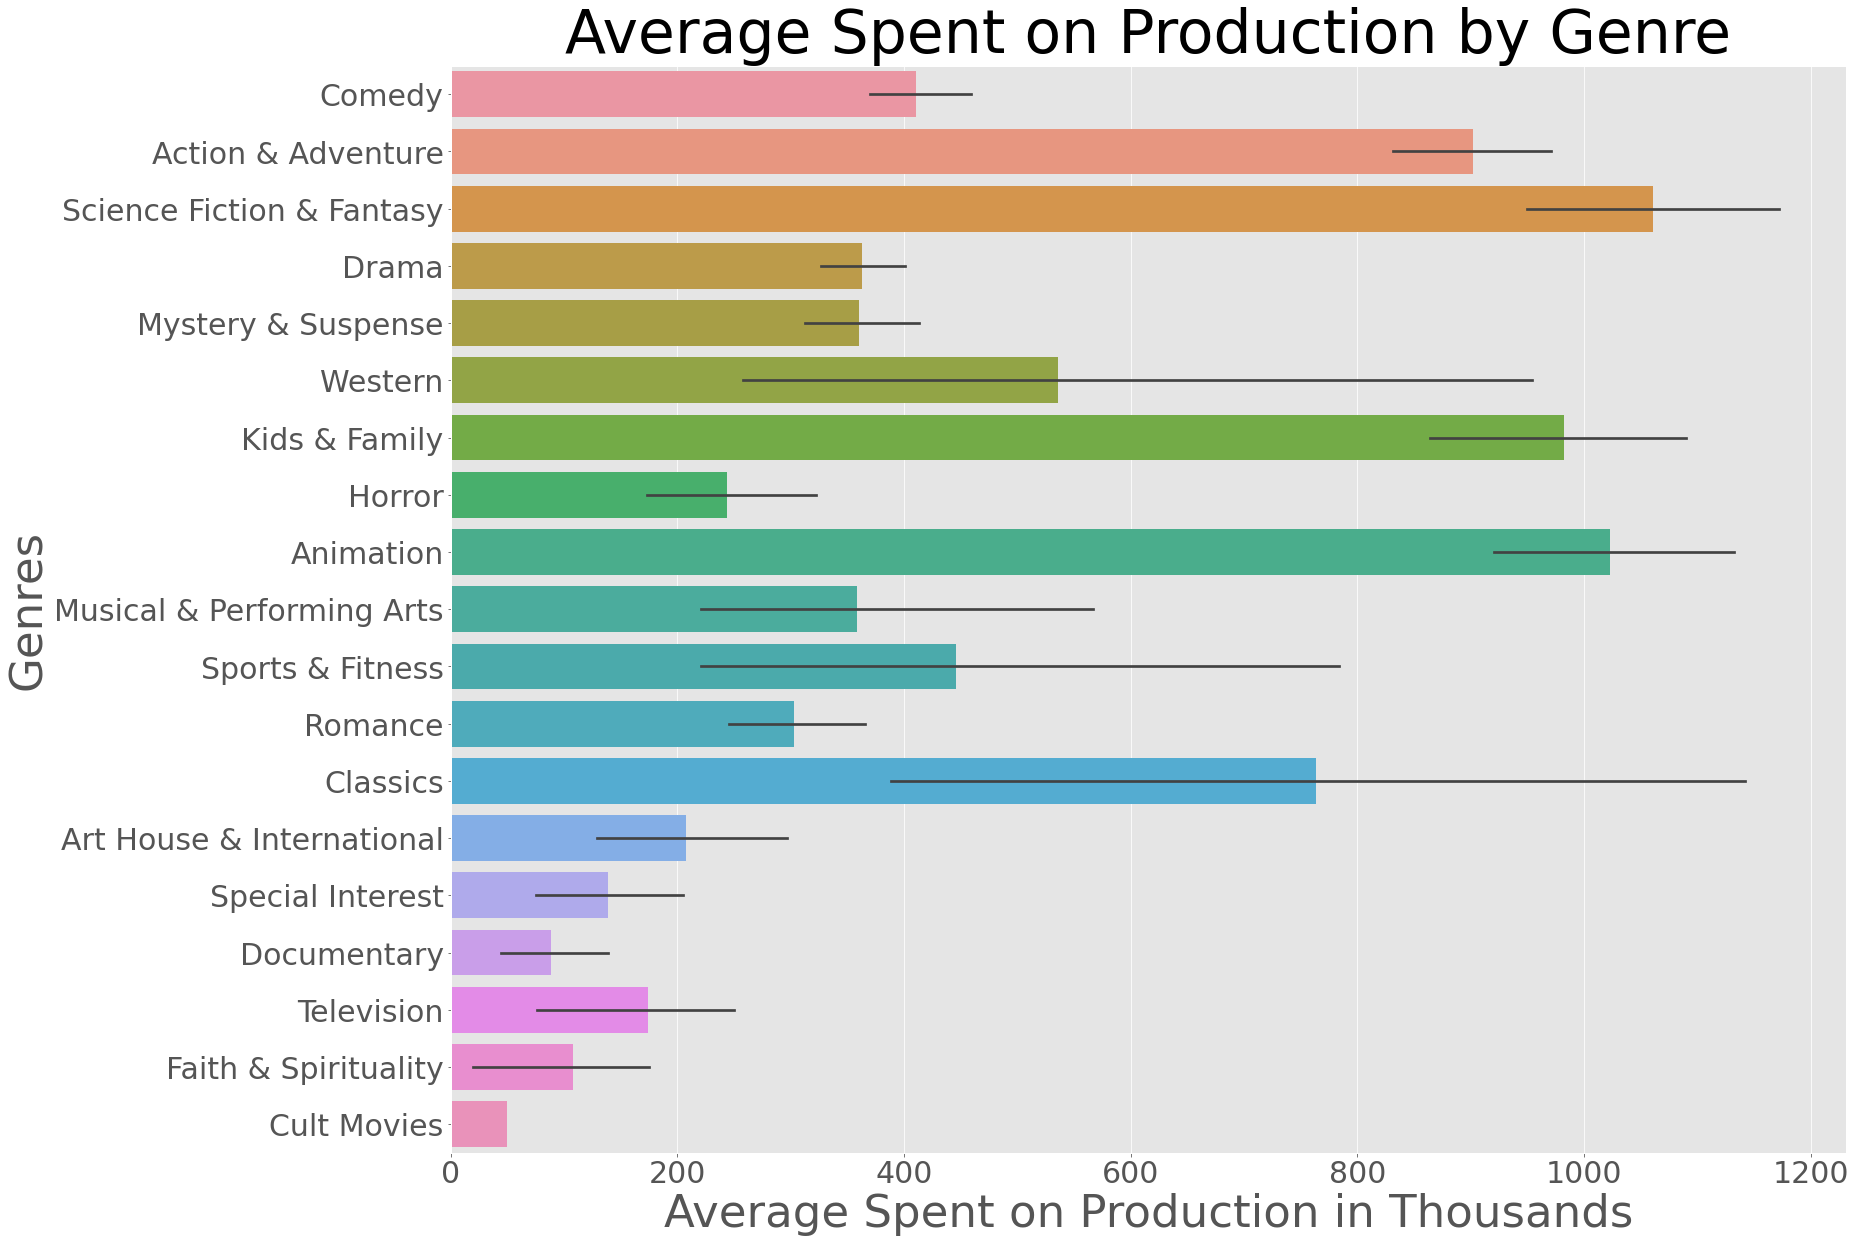

In [67]:

plot_fig_two, plot_two_ax = plt.subplots(figsize=(25, 20))

sns.barplot(x='new_x', y='genres', data=df_sorted)

plot_two_ax.set_xlabel('Average Spent on Production in Thousands', fontsize=45)
plot_two_ax.set_ylabel('Genres', fontsize=45)
plot_two_ax.set_title('Average Spent on Production by Genre', fontsize=60)

locs, labels = plt.xticks(fontsize=30)
locs, labels = plt.yticks(fontsize=30)
#plt.setp(labels, rotation=90, fontsize=30)
plt.savefig('average_production.png');

Importing the different programs used

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Imorting the Rotten Tomatoes data set

In [ ]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head()

Filtering the relevent columns from the Rotten Tomates data set

In [ ]:
df = df[['movie_title', 'content_rating', 'audience_count']]
df

Sorting the movies by audience_count by greatest to least from the Rotten Tomatoes data set

In [ ]:
df = df.sort_values('audience_count', ascending=False)
df

Deleting null values from audience_count values

In [ ]:
df = df[df['audience_count'].notna()]
df
#audience_count column ordered from greatest to least, and NaN values dropped

Finding the mean for audience_count 

In [ ]:
df['audience_count'].mean()


Amount of movies in each content_rating

In [ ]:
df.content_rating.value_counts()

DataFrame with movies that have a value of R in content_rating

In [ ]:
df_R = df.loc[df['content_rating'] == 'R']
df_R

Mean audience_count for movies with a content_rating of R

In [ ]:
df_R.mean()

DataFrame with movies that have a value of PG-13 in content_rating

In [ ]:
df_PG13 = df.loc[df['content_rating'] == 'PG-13']
df_PG13

Mean audience_count for movies with a content_rating of Pg-13

In [ ]:
df_PG13.mean()

Seaborn barplot for Average Audience per Movie by Content rating

In [ ]:
plot_fig, plot_ax = plt.subplots(figsize=(15, 12))

sns.barplot(x="content_rating", y="audience_count", data=df)
plot_ax.set_xlabel('Content Rating', fontsize=15)
plot_ax.set_ylabel('Mean Audience Count', fontsize=15);
plot_ax.set_title('Average Audience per Movie by Content Rating', fontsize=23);